# Data Preprocessing

Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Call The Dataset

In [5]:
power = pd.read_csv('PowerPlant.csv')
power.head(5)

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
power.shape

(9568, 5)

Drop & Convert Columns

In [7]:
power['AT']=power['AT'].astype(int)
power['V'] = power['V'].astype(int)
power['AP'] = power['AP'].astype(int)
power['RH'] = power['RH'].astype(int)
power['PE']=power['PE'].astype(int)


power.head(5)
# power.columns

,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464


Info About Dataset

In [8]:
power.shape

(9568, 5)

In [9]:
power.info

<bound method DataFrame.info of       AT   V    AP  RH   PE
0      8  40  1010  90  480
1     23  58  1011  74  445
2     29  56  1007  41  438
3     19  49  1007  76  453
4     11  40  1017  97  464
...   ..  ..   ...  ..  ...
9563  15  48  1011  72  462
9564  33  77  1010  59  432
9565  15  43  1014  78  465
9566  17  59  1018  94  450
9567  23  51  1011  71  451

[9568 rows x 5 columns]>

In [10]:
print(power.isnull().sum())

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [11]:
power.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.157922,53.808737,1012.767140,72.821175,453.871133
std,7.460963,12.703648,5.948994,14.610196,17.067651
min,1.000000,25.000000,992.000000,25.000000,420.000000
25%,13.000000,41.000000,1009.000000,63.000000,439.000000
50%,20.000000,52.000000,1012.000000,74.000000,451.000000
75%,25.000000,66.000000,1017.000000,84.000000,468.000000
max,37.000000,81.000000,1033.000000,100.000000,495.000000


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

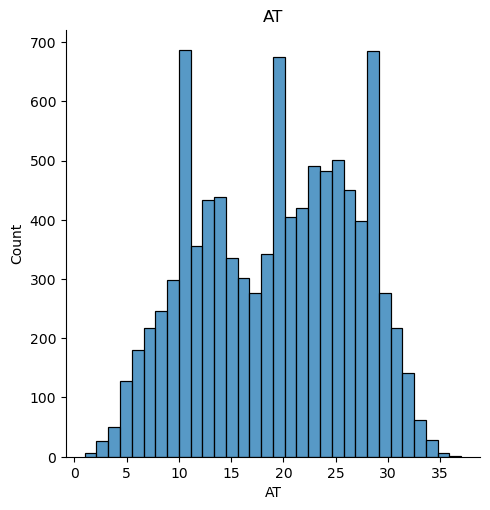

In [12]:
plt.figure(figsize=(6,6))
sns.displot(power['AT'])
plt.title('AT')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

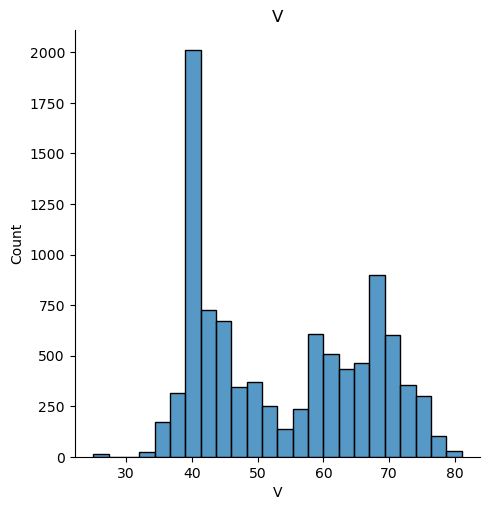

In [13]:
plt.figure(figsize=(6,6))
sns.displot(power['V'])
plt.title('V')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

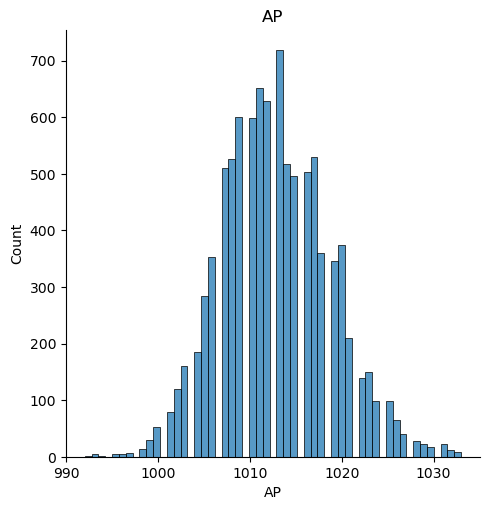

In [14]:
plt.figure(figsize=(6,6))
sns.displot(power['AP'])
plt.title('AP')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

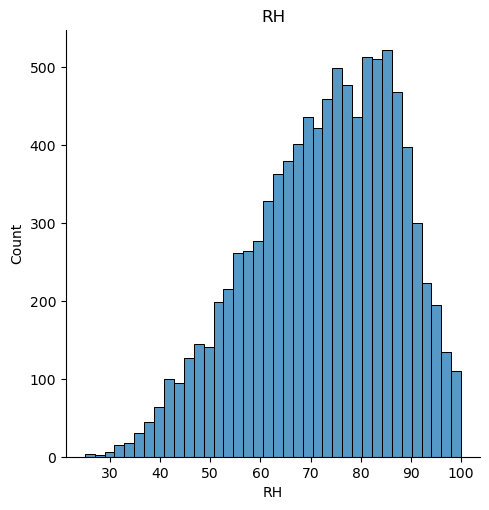

In [15]:
plt.figure(figsize=(6,6))
sns.displot(power['RH'])
plt.title('RH')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

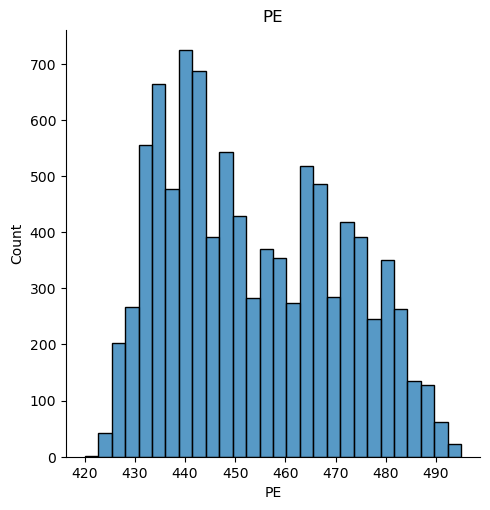

In [16]:
plt.figure(figsize=(6,6))
sns.displot(power['PE'])
plt.title('PE')
plt.show()

In [17]:
power['RH'].value_counts()

RH
86    267
84    267
82    265
75    261
85    254
     ... 
33      3
25      2
28      2
26      2
29      2
Name: count, Length: 75, dtype: int64

In [18]:
power['V'].value_counts()

V
41    761
40    699
39    550
44    469
43    412
69    396
58    328
42    315
71    314
68    296
70    288
59    277
63    265
66    239
73    224
65    224
60    220
67    205
38    203
49    201
45    201
74    183
64    171
50    169
48    156
62    152
52    138
61    135
72    133
56    121
57    114
37    113
51    112
36     99
46     96
47     94
77     84
75     79
35     75
54     70
53     55
76     40
34     21
79     20
78     18
25     13
55     13
80      6
81      1
Name: count, dtype: int64

In [19]:
power['PE'].value_counts()

PE
440    263
442    254
435    240
438    240
439    239
      ... 
494     12
495      5
493      5
421      1
420      1
Name: count, Length: 73, dtype: int64

Splitting The dataset into Features & Dependent

In [20]:
X = power.drop(columns='PE' , axis=1).values
y = power['PE'].values
print(X)
print(y)

[[   8   40 1010   90]
 [  23   58 1011   74]
 [  29   56 1007   41]
 ...
 [  15   43 1014   78]
 [  17   59 1018   94]
 [  23   51 1011   71]]
[480 445 438 ... 465 450 451]


Dealing With Missing Data

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imputer.fit(X[: , 0:9])
X[: , 0:9] = imputer.transform(X[: , 0:9])
print(X.shape)


(9568, 4)


In [22]:
power.head(5)

,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464


Encoding

In [24]:
power.head(10)


,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464
5,13,39,1016,84,470
6,22,71,1008,75,442
7,14,41,1021,78,464
8,31,69,1010,36,428
9,6,38,1017,81,484


# Correlation

<Axes: >

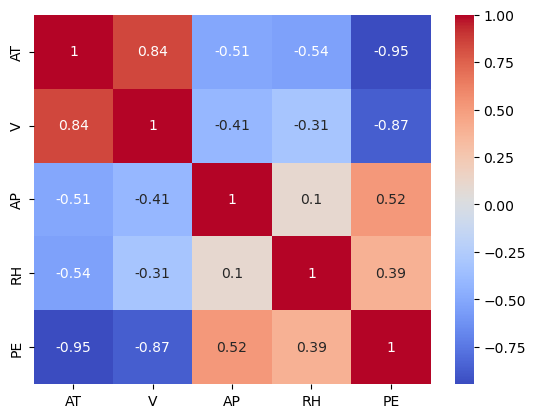

In [25]:
correlation_matrix = power.corr()
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm')

In [26]:
X = power.drop(columns='PE' , axis=1).values
y = power['PE'].values
print(X)
print(y)

[[   8   40 1010   90]
 [  23   58 1011   74]
 [  29   56 1007   41]
 ...
 [  15   43 1014   78]
 [  17   59 1018   94]
 [  23   51 1011   71]]
[480 445 438 ... 465 450 451]


Splitting The Dataset into X_train, X_test, y_train, y_test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X.shape)

(7654, 4)
(1914, 4)
(9568, 4)


Feature Scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(X_train)
print(X_test)

[[ 0.78150124  0.72256351 -0.29349626 -0.47772454]
 [ 0.91525519  1.27336321 -0.96911141  0.82557282]
 [ 0.91525519  1.50942023  0.38211889  0.82557282]
 ...
 [-0.15477642 -0.85114992  0.38211889 -0.82069753]
 [ 0.91525519  1.11599187 -0.46240005 -0.47772454]
 [-1.75982384 -1.16589261  1.90225298  0.89416742]]
[[ 1.33016528  0.25431742 -1.3014818  -1.03595782]
 [ 0.78939715  1.35844728 -0.80631161  0.32283832]
 [-0.2921391  -0.77094603  1.99965279 -0.15274033]
 ...
 [-0.6977152  -1.16527812 -0.31114142 -0.08480052]
 [ 1.33016528  1.35844728 -0.80631161 -0.35655975]
 [-0.2921391  -0.29774751  0.3490855   1.13811601]]


# Linear Regression

In [56]:
reg = LinearRegression()
reg.fit(X_train , y_train)
y_pred_train_reg = reg.predict(X_train)
train_score = reg.score(X_train , y_train)
print("train_score : " , train_score)

reg.fit(X_test , y_test)
y_pred_test_reg = reg.predict(X_test)
test_score = reg.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.9266472413543689
test_score :  0.9304123574015184


In [62]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
y_pred = reg.predict(X_train)
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


ValueError: Found input variables with inconsistent numbers of samples: [1914, 7654]

In [ ]:
print(y_pred_test_reg[:3])
print(y_test[:3])

In [31]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(9568, 4)
(7654, 4)
(1914, 4)


In [32]:
score_r2 = metrics.r2_score(y_test , y_pred_test_reg)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9304123574015184


Text(0, 0.5, 'Predicted PE')

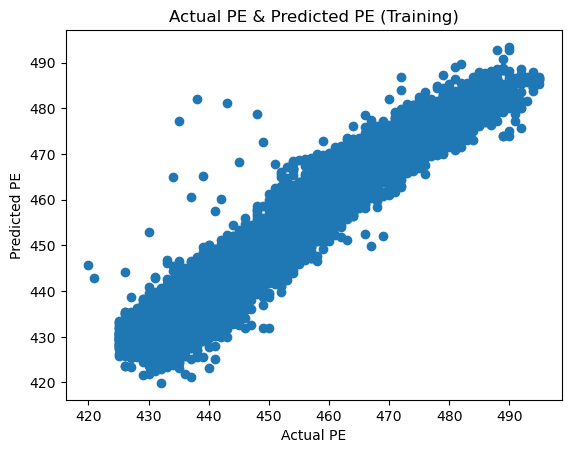

In [33]:
plt.scatter(y_train , y_pred_train_reg)
plt.title("Actual PE & Predicted PE (Training)")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

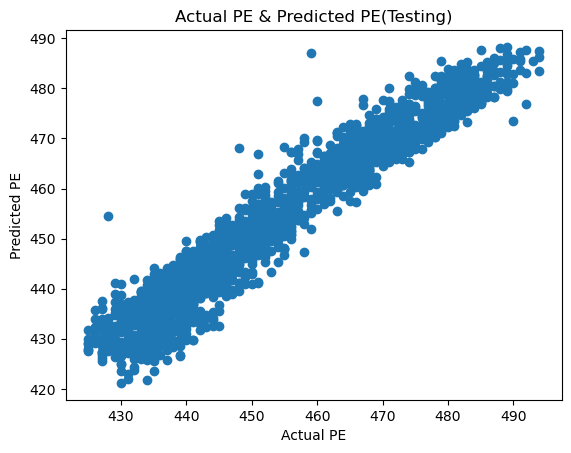

In [34]:
plt.scatter(y_test , y_pred_test_reg)
plt.title("Actual PE & Predicted PE(Testing)")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [35]:
input_data = (5 , 60 , 1007 , 41)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = reg.predict(input_data_reshape)
print('the PE is ' , prediction[0])

the PE is  571.5185239604141


# Ridge

In [36]:
R_module = Ridge(alpha=0.1 , random_state=33)
R_module.fit(X_train , y_train)
y_pred_train_R_module = R_module.predict(X_train)
train_score = R_module.score(X_train , y_train)
print("train_score : " , train_score)

R_module.fit(X_test , y_test)
y_pred_test_R_module = R_module.predict(X_test)
test_score = R_module.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.9266472407338597
test_score :  0.9304123474513739


In [37]:
print(y_pred_test_R_module[:3])
print(y_test[:3])

[435.43716218 437.04676215 461.56065105]
[433 438 458]


In [38]:
score_r2 = metrics.r2_score(y_test , y_pred_test_R_module)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9304123474513739


Text(0, 0.5, 'Predicted PE')

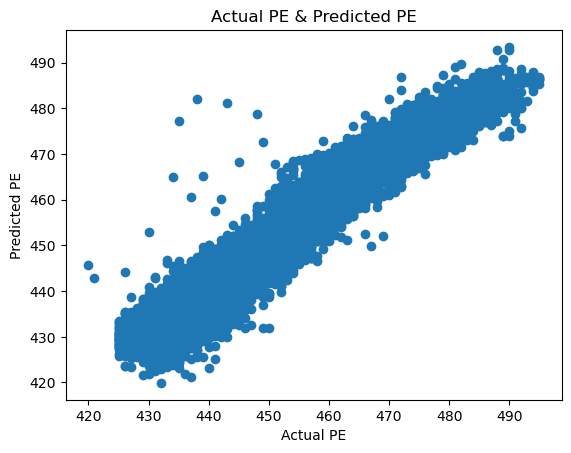

In [39]:
plt.scatter(y_train , y_pred_train_R_module)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

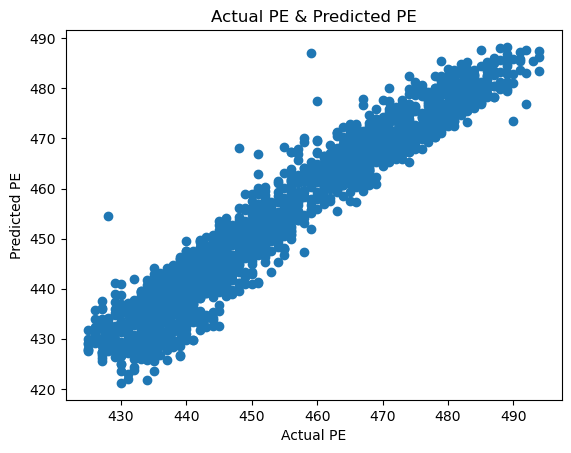

In [40]:
plt.scatter(y_test , y_pred_test_R_module)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [42]:
power.head(5)

,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464


In [43]:
input_data = (5 ,40,1010,90)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = R_module.predict(input_data_reshape)
print('the price is ' , prediction[0])

the price is  520.5128523527355


# KNeighborsRegressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 6)

knn_scaled = knn.fit(X_train , y_train)
y_pred_train_knn = knn_scaled.predict(X_train)
train_score = knn_scaled.score(X_train , y_train)
print("train_score : " , train_score)

knn_scaled.fit(X_test , y_test)
y_pred_test_knn = knn_scaled.predict(X_test)
test_score = knn_scaled.score(X_test , y_test)
print("test_score : " , test_score)

train_score :  0.9628851077218905
test_score :  0.9548260138310907


In [45]:
print(y_pred_test_knn[:3])
print(y_test[:3])

[436.5        436.5        462.16666667]
[433 438 458]


In [46]:
score_r2 = metrics.r2_score(y_test , y_pred_test_knn)
print('R2 Squared Error : ' , score_r2)

R2 Squared Error :  0.9548260138310907


Text(0, 0.5, 'Predicted PE')

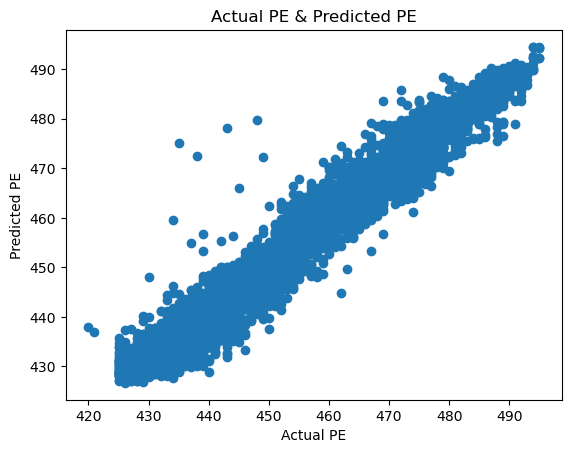

In [48]:
plt.scatter(y_train , y_pred_train_knn)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

Text(0, 0.5, 'Predicted PE')

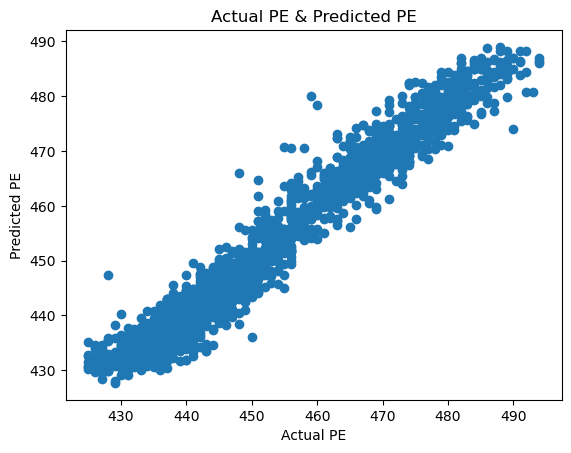

In [49]:
plt.scatter(y_test , y_pred_test_knn)
plt.title("Actual PE & Predicted PE")
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")

In [50]:
power.head(5)

,AT,V,AP,RH,PE
0,8,40,1010,90,480
1,23,58,1011,74,445
2,29,56,1007,41,438
3,19,49,1007,76,453
4,11,40,1017,97,464


In [51]:
input_data = (8,40,1010,90)
input_data_as_numby_array = np.asarray(input_data)
input_data_reshape = input_data_as_numby_array.reshape(1,-1)
prediction = knn_scaled.predict(input_data_reshape)
print('the pe is ' , prediction[0])

the pe is  475.3333333333333


# Histogram

array([[<Axes: title={'center': 'AT'}>, <Axes: title={'center': 'V'}>],
       [<Axes: title={'center': 'AP'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'PE'}>, <Axes: >]], dtype=object)

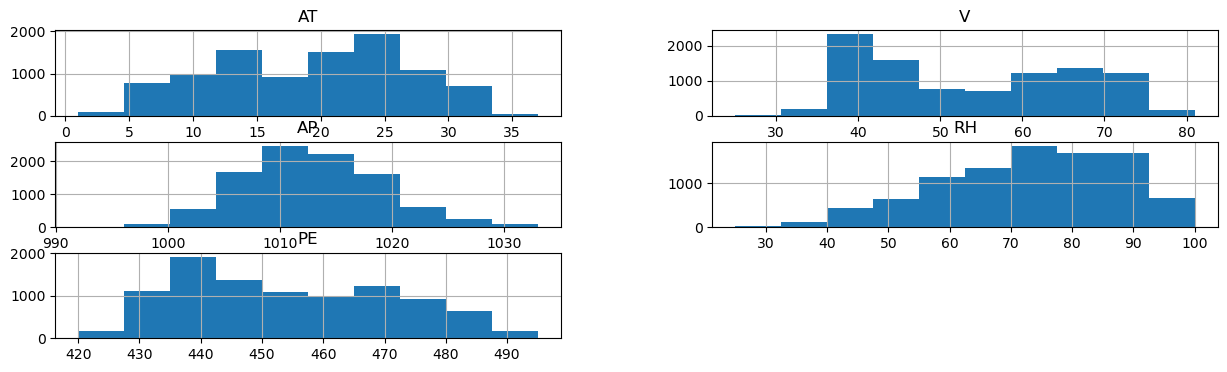

In [52]:
power.hist(figsize=(15,4))

# Lasso

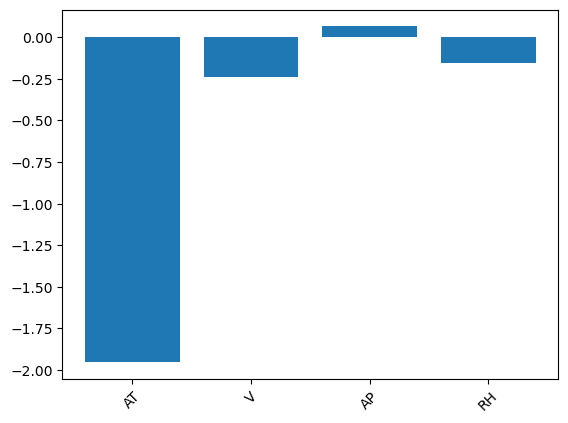

In [53]:
names = power.drop("PE", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

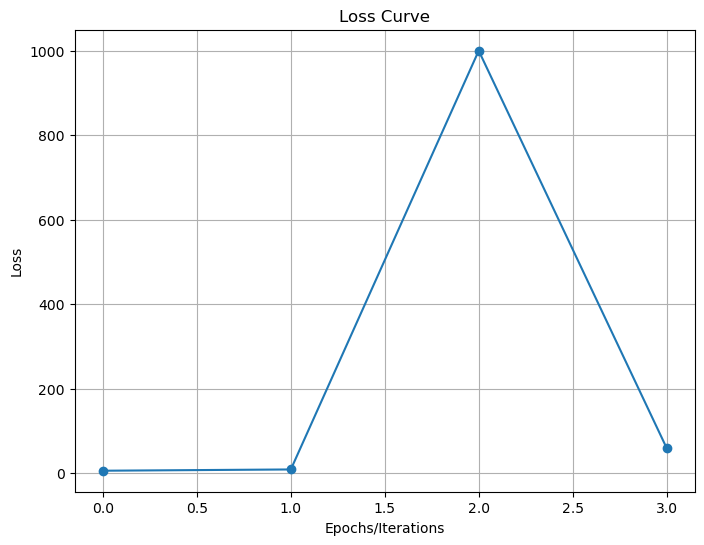

In [54]:
import matplotlib.pyplot as plt
# Assuming loss_values is a list or array containing loss values per epoch/iteration
loss_values = [6,9,1000,60]
# Plotting the loss curve
plt.figure(figsize=(8, 6))
plt.plot(loss_values, marker='o', linestyle='-')
plt.title('Loss Curve')
plt.xlabel('Epochs/Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

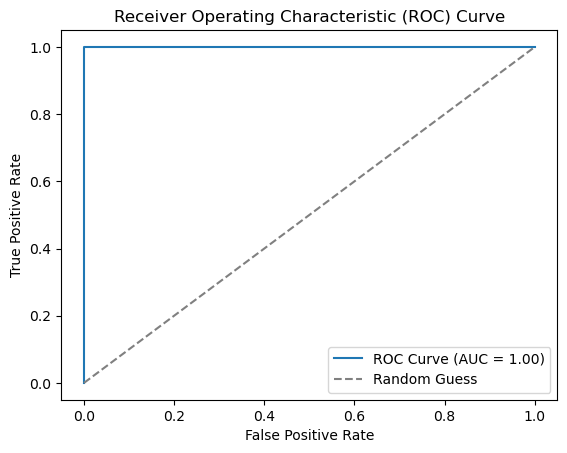

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and y_scores contains the predicted probabilities
y_true = [0, 1, 1, 0, 1]
y_scores = [0.2, 0.8, 0.6, 0.3, 0.9]  # Predicted probabilities for positive class

# Calculate the fpr, tpr, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate the AUC (Area Under the Curve) score
auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
